In [153]:
import numpy as np
import pandas as pd
from scipy.stats import f, t
import matplotlib.pyplot as plt
from funciones_qq_pp_plot import*
from funcioneschicuadrado_continuas import*
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import acf
import statsmodels.api as sm
import pandas_profiling
%matplotlib inline


In [137]:
df = pd.read_excel("DatosML.xlsx")

In [138]:
df.keys()

Index(['llegada_fila', 'TEA_caja', 'inicio_servicio_caja', 'fin_servicio_caja',
       'ts_caja_seg', 'inicio_servicio_armado', 'fin_servicio_armado',
       'ts_armado_seg'],
      dtype='object')

In [139]:
df['llegada_fila']

0     12:36:57
1     12:38:06
2     12:39:12
3     12:39:34
4     12:39:41
5     12:40:03
6     12:41:00
7     12:43:33
8     12:45:22
9     12:45:38
10    12:45:41
11    12:46:18
12    12:46:32
13    12:48:33
14    12:49:34
15    12:50:10
16    12:51:34
17    12:51:57
18    12:54:18
19    12:57:50
20    12:58:28
Name: llegada_fila, dtype: object

In [140]:
import datetime
import pandas as pd

# Función para convertir datetime.time a segundos
def time_to_seconds(time):
    return time.hour * 3600 + time.minute * 60 + time.second

# Lista de columnas a convertir
columnas = ['llegada_fila', 'TEA_caja', 'inicio_servicio_caja', 'fin_servicio_caja', 'ts_caja_seg', 'inicio_servicio_armado', 'fin_servicio_armado', 'ts_armado_seg']

# Aplicar la función a cada columna

for columna in columnas:
    for i in range(0, len(df[columna])):
        if isinstance(df[columna][i], datetime.time):
            df[columna][i] = time_to_seconds(df[columna][i])
        elif isinstance(df[columna][i], str):
            tiempo = datetime.datetime.strptime(df[columna][i], '%H:%M:%S,%f').time()
            df[columna][i] = time_to_seconds(tiempo)




C:\Users\user\AppData\Local\Temp\ipykernel_24116\467220221.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna][i] = time_to_seconds(df[columna][i])
C:\Users\user\AppData\Local\Temp\ipykernel_24116\467220221.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna][i] = time_to_seconds(tiempo)


In [141]:
llegada_fila = df['llegada_fila']
TEA_caja = df['TEA_caja']
inicio_servicio_caja = df['inicio_servicio_caja']
fin_servicio_caja = ['fin_servicio_caja']
ts_caja_seg = df['ts_caja_seg']
inicio_servicio_armado = df['inicio_servicio_armado']
fin_servicio_armado = df['fin_servicio_armado']
ts_armado_seg = df['ts_armado_seg']

In [142]:
df.describe()

TEA_caja  ts_caja_seg  ts_armado_seg
count   21.000000    21.000000      21.000000
mean    61.464762    38.818095      96.790095
std     56.918921    16.365052      71.509607
min      0.000000     8.810000       4.004000
25%     21.480000    27.870000      46.046000
50%     37.880000    37.760000      82.022000
75%     84.400000    51.240000     133.013000
max    212.490000    85.830000     261.021000

In [143]:
print(df.dtypes)


llegada_fila               object
TEA_caja                  float64
inicio_servicio_caja       object
fin_servicio_caja          object
ts_caja_seg               float64
inicio_servicio_armado     object
fin_servicio_armado        object
ts_armado_seg             float64
dtype: object


In [144]:
llegada_fila[0] = inicio_servicio_caja[0]

C:\Users\user\AppData\Local\Temp\ipykernel_24116\1774126794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  llegada_fila[0] = inicio_servicio_caja[0]


In [145]:
inicio_servicio_armado[0]

45742

In [146]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#############
llegada_fila Distr. Normal
Parámetro estimado: Media = 45979.52380952381
Parámetro estimado: Desviación Estándar = 361.2584642669776


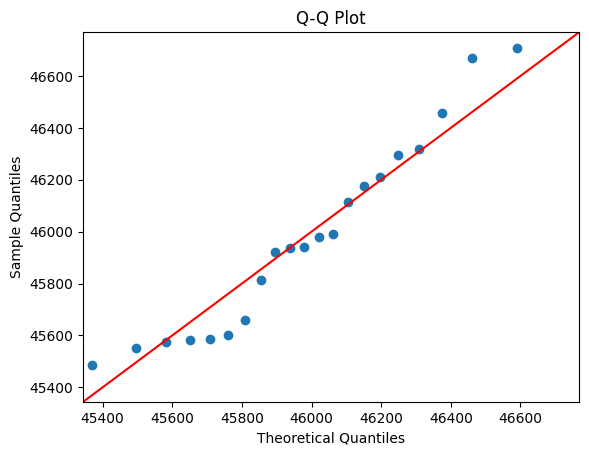

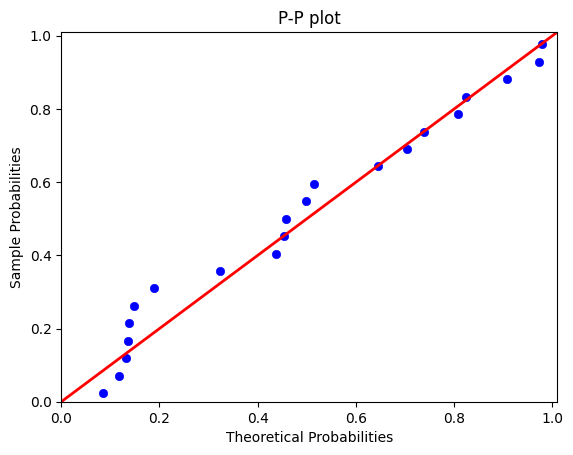



llegada_fila Distr. Exponencial
Parámetro estimado: Tasa = 2.1748811582795654e-05


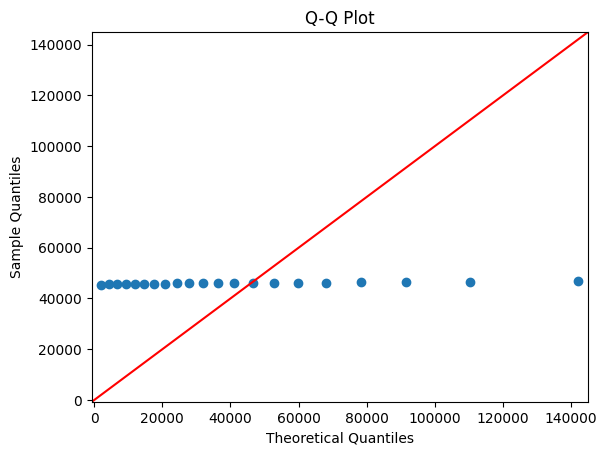

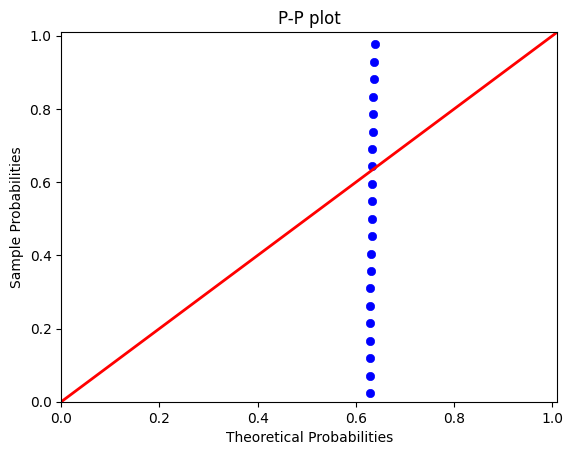



llegada_fila Distr. Uniforme
Parámetro estimado: a = 45486.0
Parámetro estimado: b = 46708.0


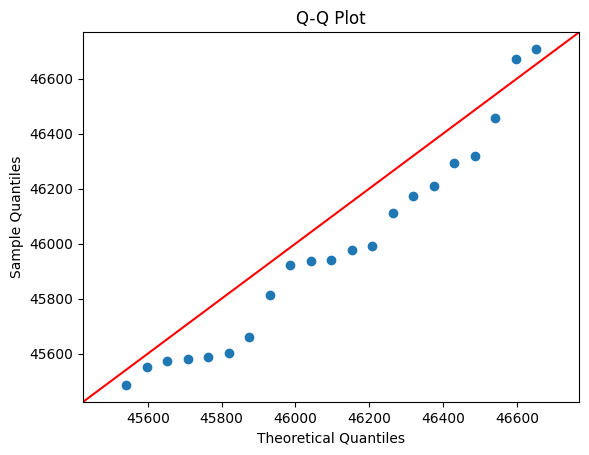

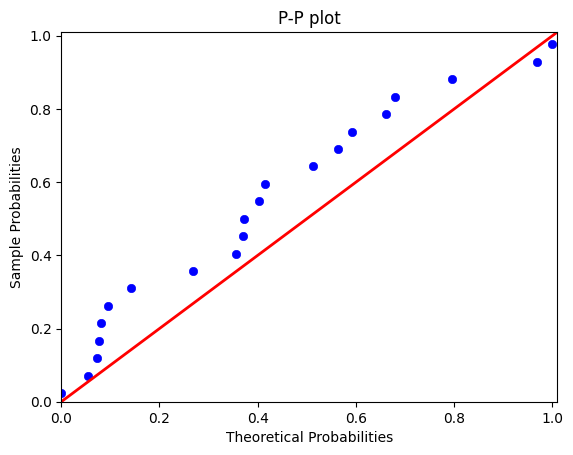



llegada_fila Distr. Weibull
Parámetro estimado: Escala = 46165.3542870777
Parámetro estimado: Forma = 125.24582324141484


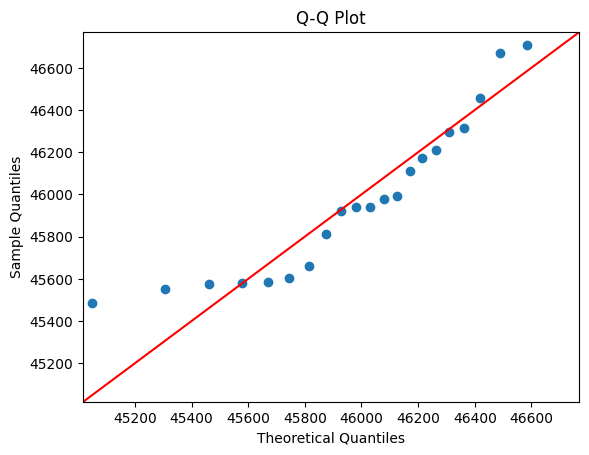

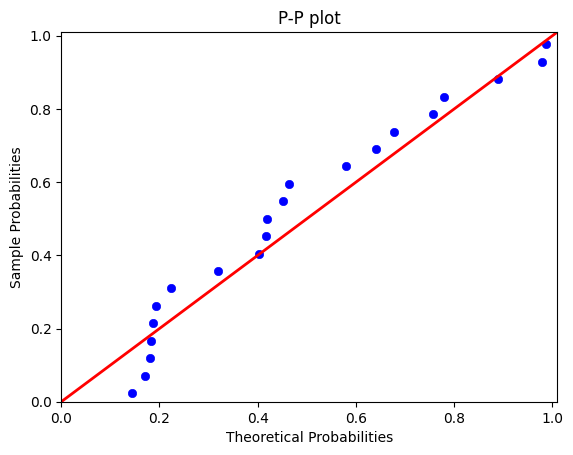



llegada_fila Distr. LogNorm
Parámetro estimado (normal asociada): Media = 10.735920645232708
Parámetro estimado (normal asociada): Desviación Estándar = 0.00784374582841289


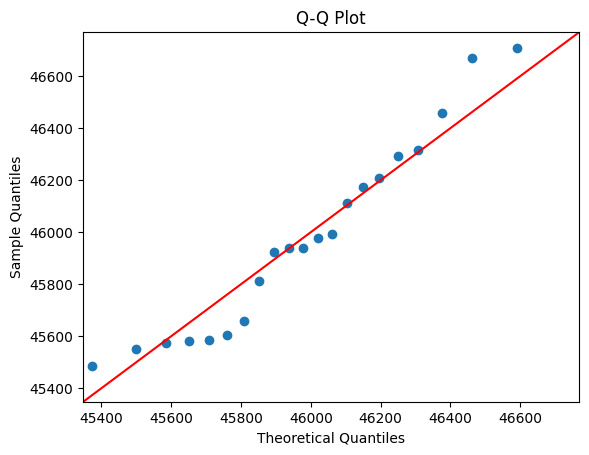

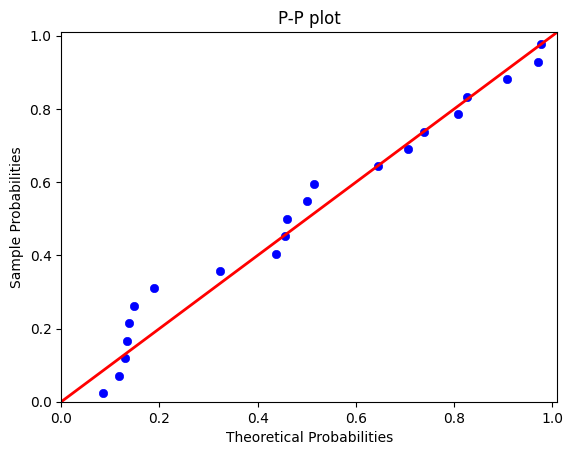



llegada_fila Distr. Triang
Parámetro estimado: a = 45486.0
Parámetro estimado: b = 46708.0
Parámetro estimado: c = 45586.0


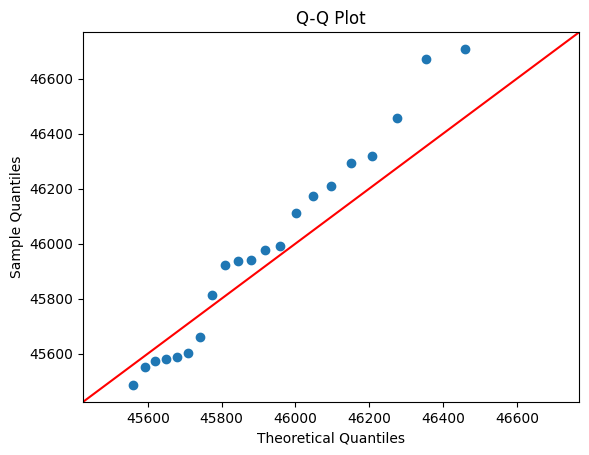

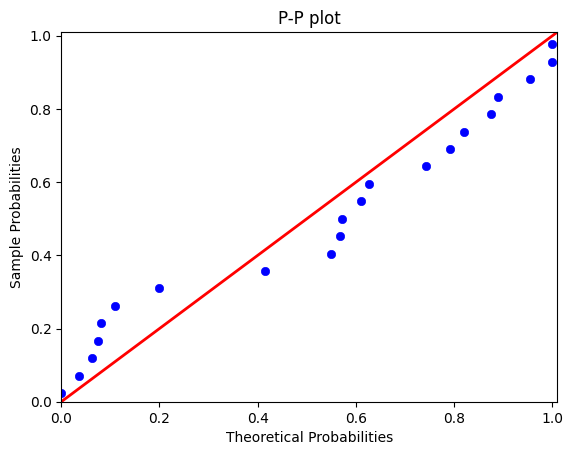

#############
#############
TEA_caja Distr. Normal
Parámetro estimado: Media = 61.464761904761914
Parámetro estimado: Desviación Estándar = 55.54717905649023


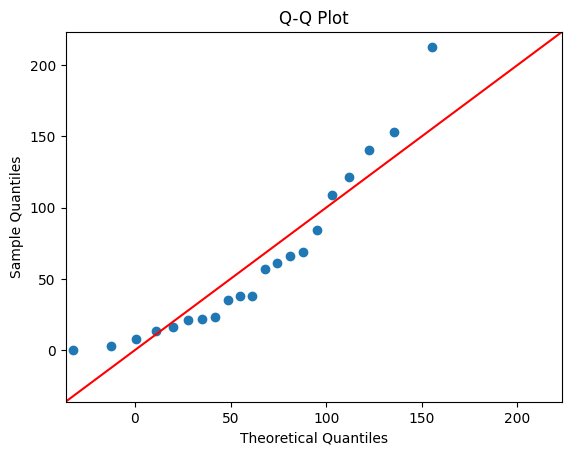

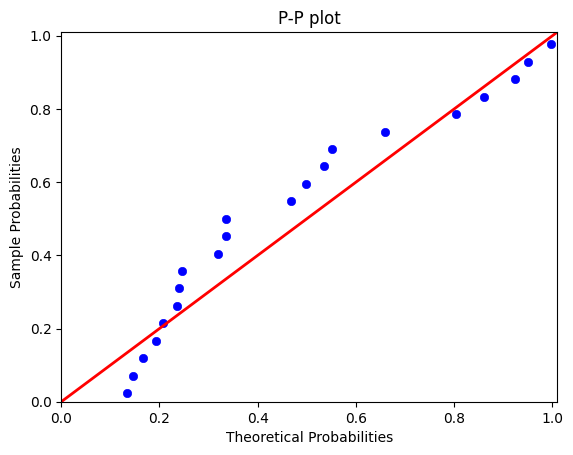



TEA_caja Distr. Exponencial
Parámetro estimado: Tasa = 0.016269484644705443


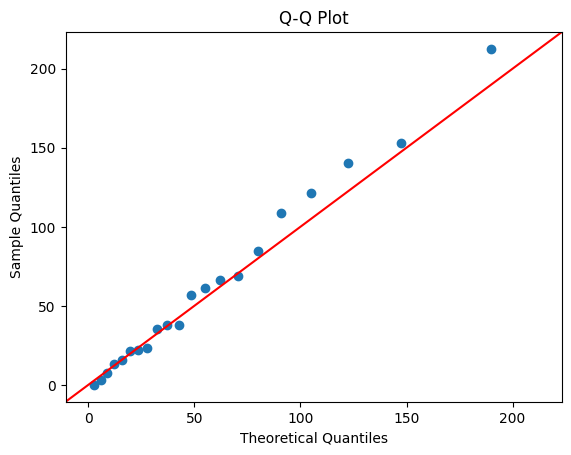

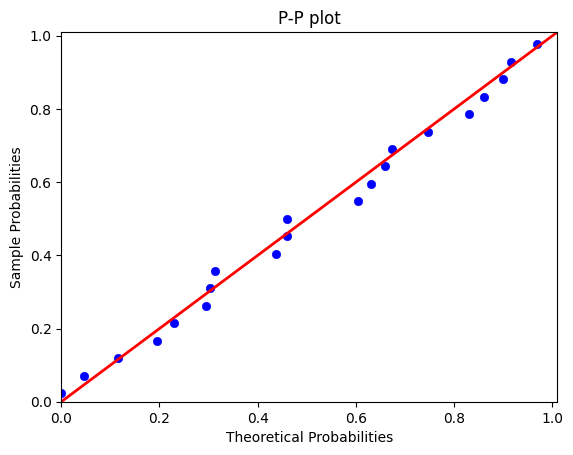



TEA_caja Distr. Uniforme
Parámetro estimado: a = 0.0
Parámetro estimado: b = 212.49


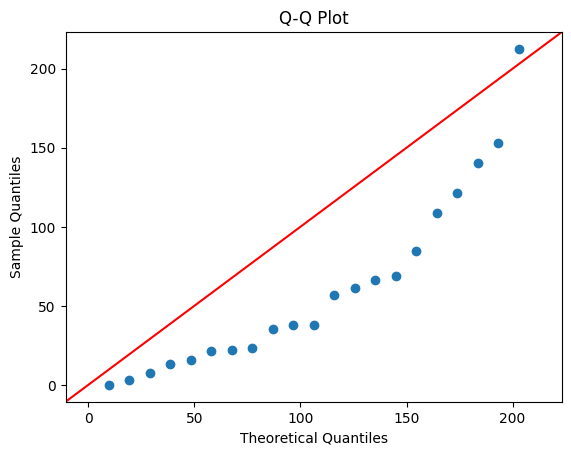

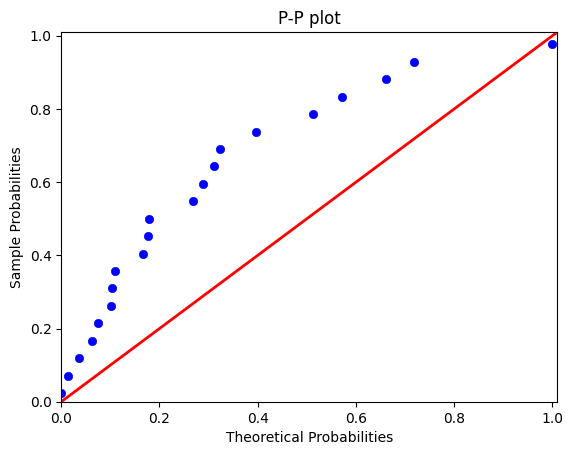



TEA_caja Distr. Weibull
Parámetro estimado: Escala = 65.10968579656969
Parámetro estimado: Forma = 1.1396197601034217


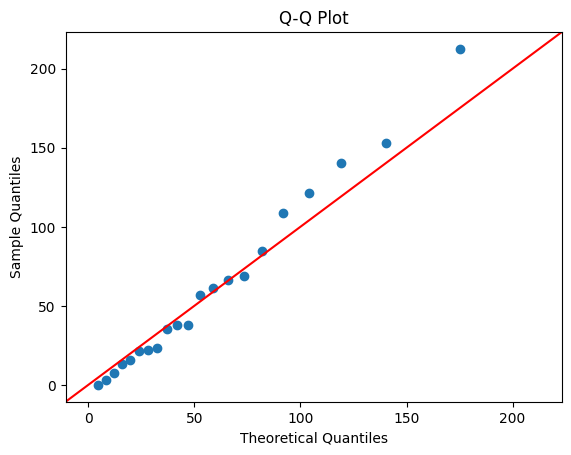

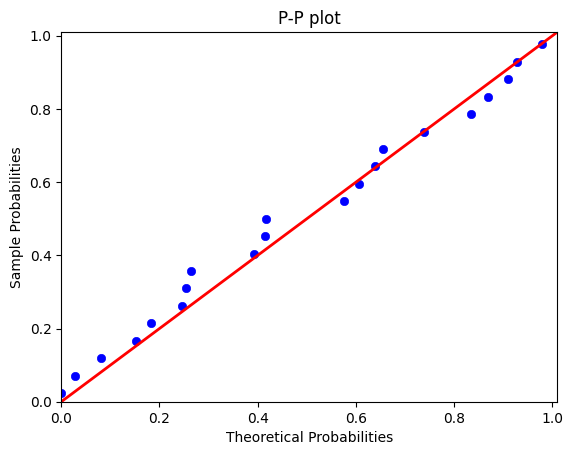



TEA_caja Distr. LogNorm
Parámetro estimado (normal asociada): Media = -inf
Parámetro estimado (normal asociada): Desviación Estándar = nan


c:\Users\user\Desktop\Andes\9\Simu\Proyecto\funciones_qq_pp_plot.py:55: RuntimeWarning: divide by zero encountered in log
  mean = np.mean(np.log(data))
c:\Users\user\Desktop\Andes\9\Simu\Proyecto\funciones_qq_pp_plot.py:61: RuntimeWarning: divide by zero encountered in log
  std_dev = np.std(np.log(data))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


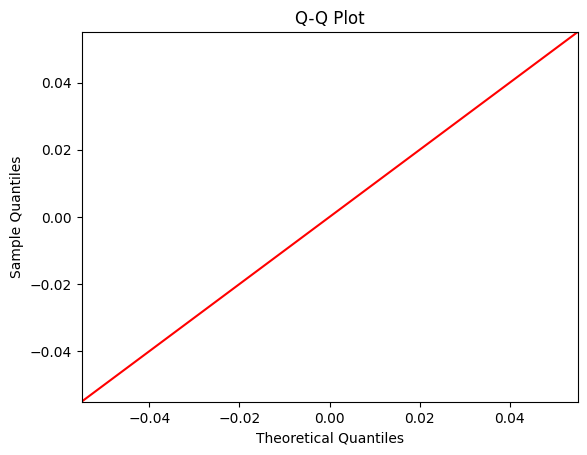

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2066: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2066: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


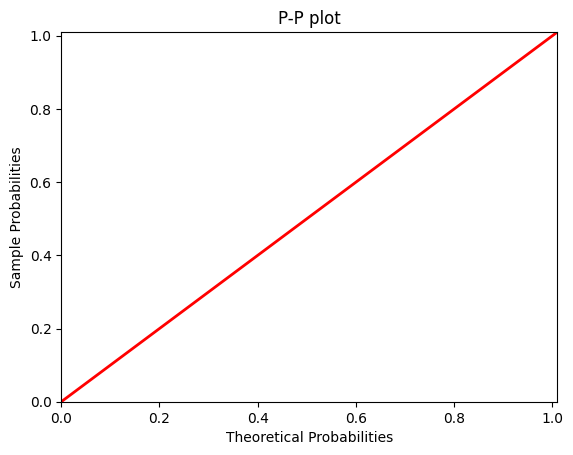



TEA_caja Distr. Triang
Parámetro estimado: a = 0.0
Parámetro estimado: b = 212.49
Parámetro estimado: c = 0.0


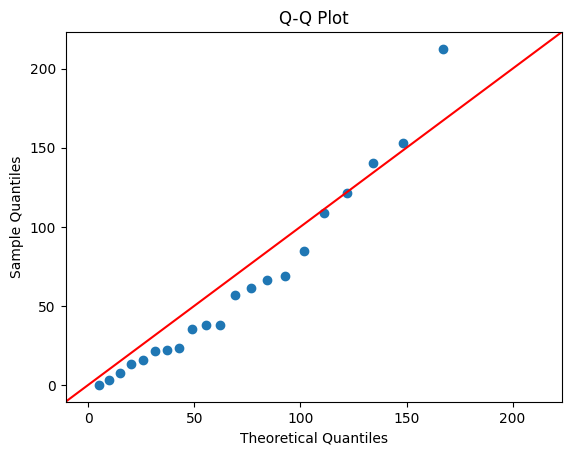

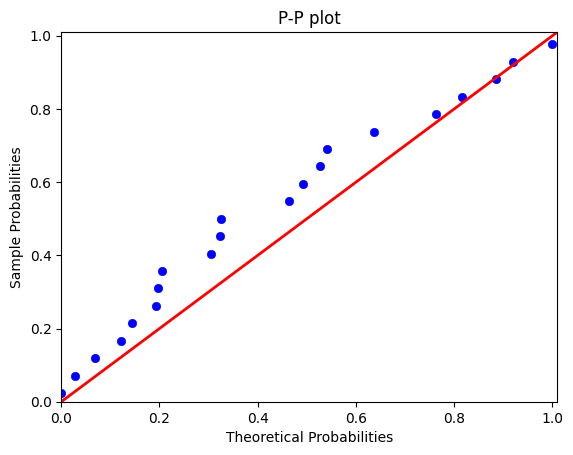

#############
#############
inicio_servicio_caja Distr. Normal
Parámetro estimado: Media = 46148.76190476191
Parámetro estimado: Desviación Estándar = 406.14622100232214


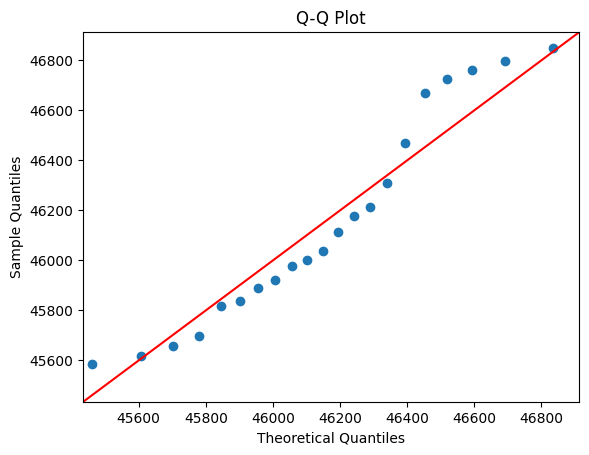

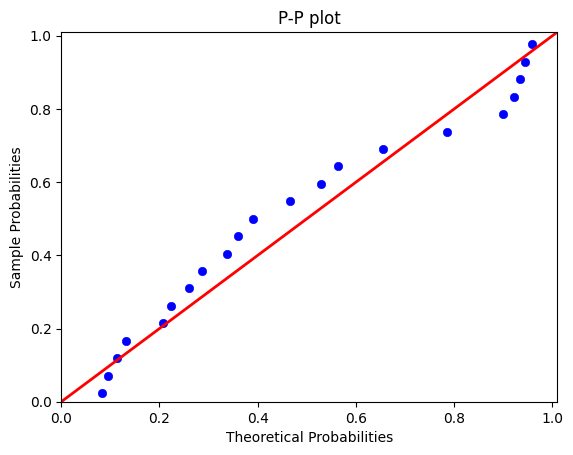



inicio_servicio_caja Distr. Exponencial
Parámetro estimado: Tasa = 2.166905370210623e-05


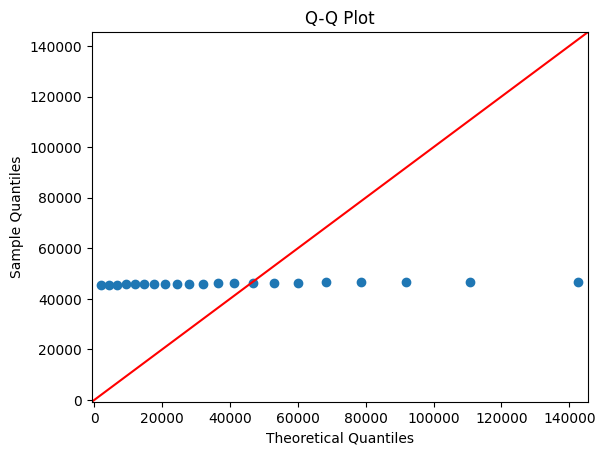

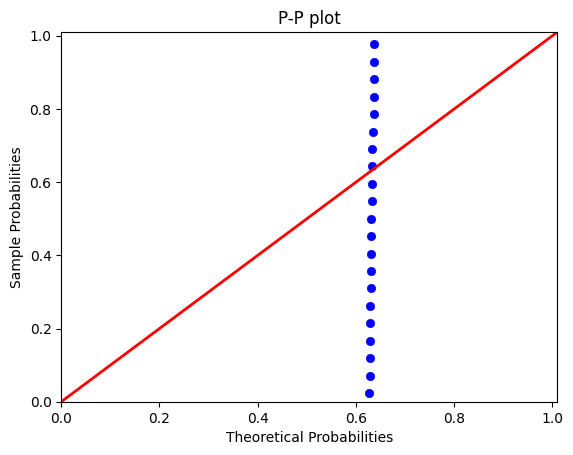



inicio_servicio_caja Distr. Uniforme
Parámetro estimado: a = 45586.0
Parámetro estimado: b = 46850.0


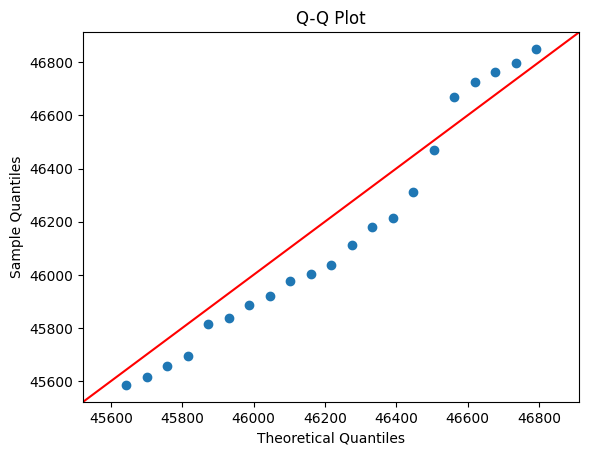

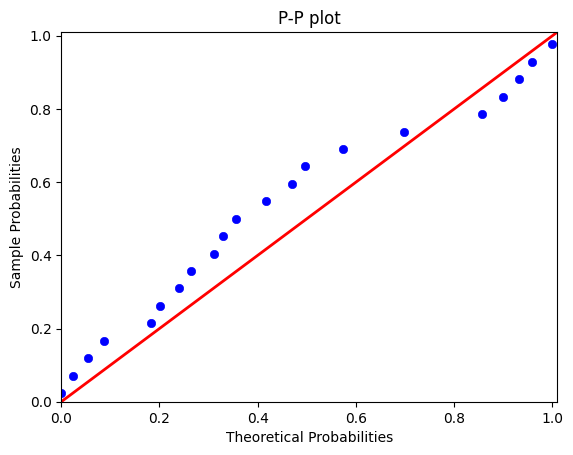



inicio_servicio_caja Distr. Weibull
Parámetro estimado: Escala = 46356.94430368277
Parámetro estimado: Forma = 116.04304286505678


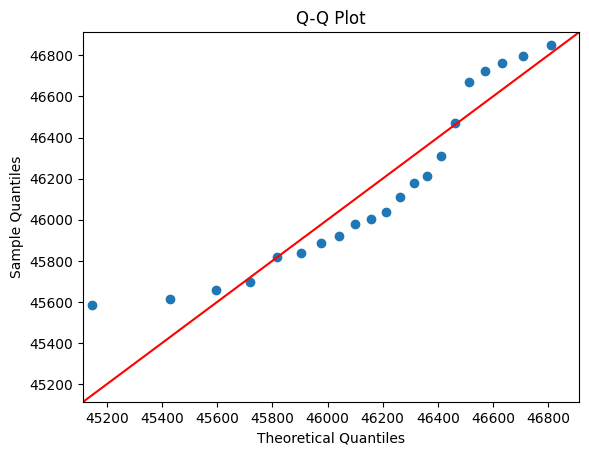

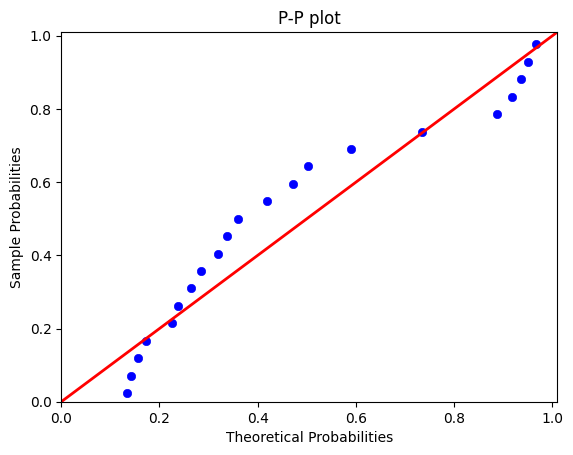



inicio_servicio_caja Distr. LogNorm
Parámetro estimado (normal asociada): Media = 10.739586774292711
Parámetro estimado (normal asociada): Desviación Estándar = 0.00878556873237612


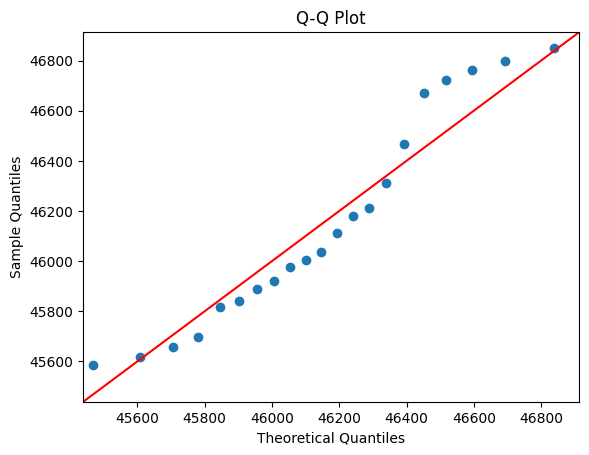

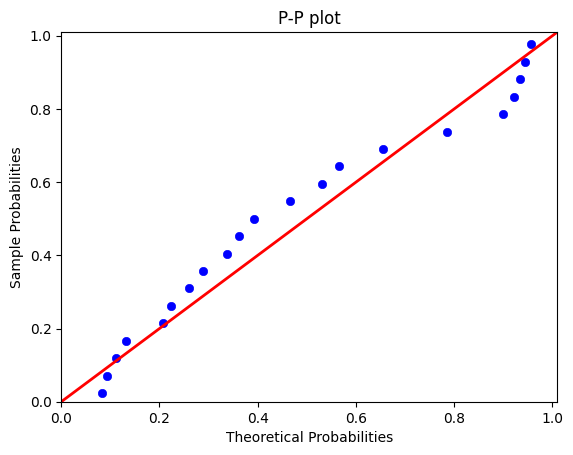



inicio_servicio_caja Distr. Triang
Parámetro estimado: a = 45586.0
Parámetro estimado: b = 46850.0
Parámetro estimado: c = 45586.0


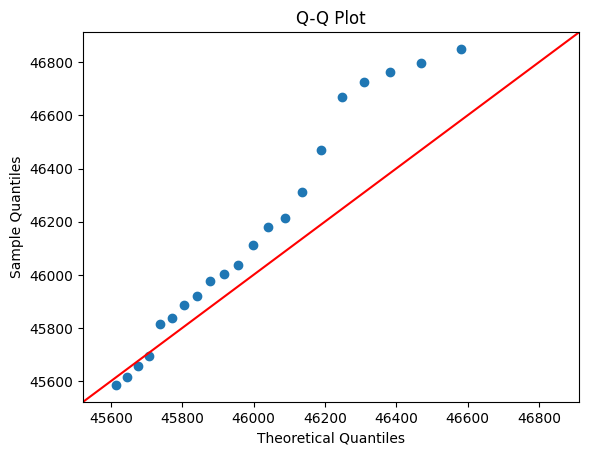

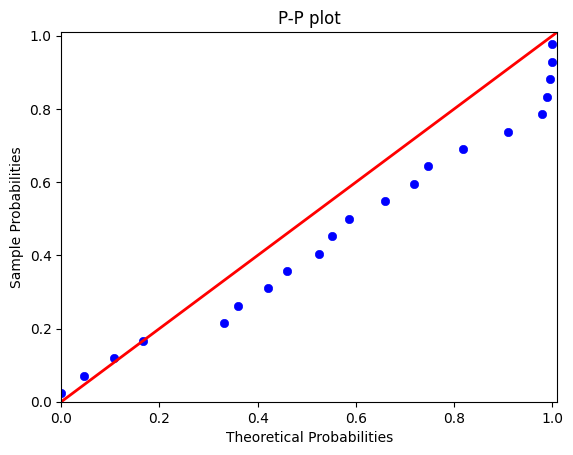

#############
#############
fin_servicio_caja Distr. Normal
Parámetro estimado: Media = 46187.47619047619
Parámetro estimado: Desviación Estándar = 405.1484876587276


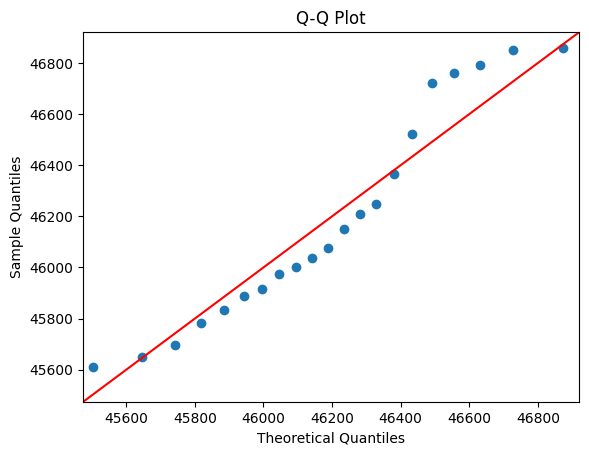

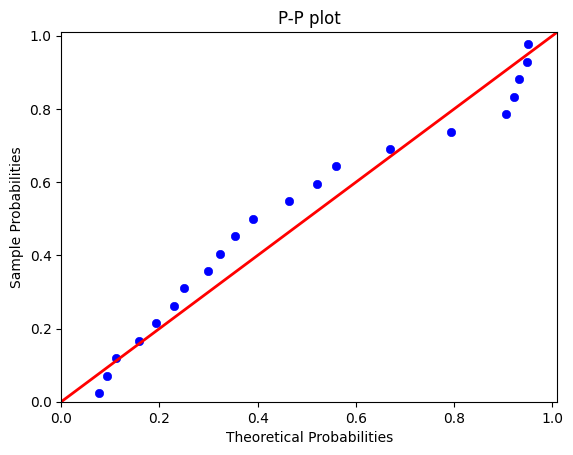



fin_servicio_caja Distr. Exponencial
Parámetro estimado: Tasa = 2.1650890727954496e-05


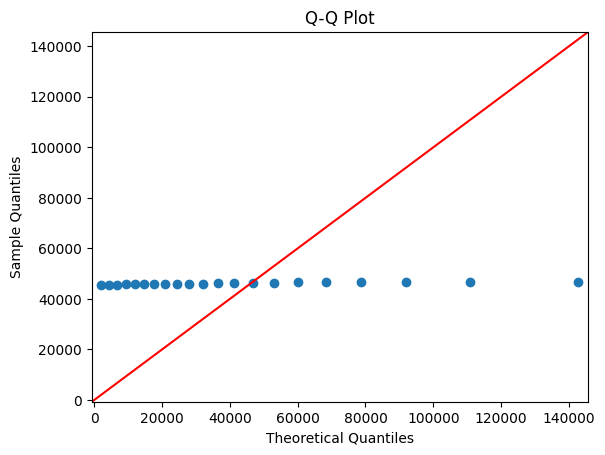

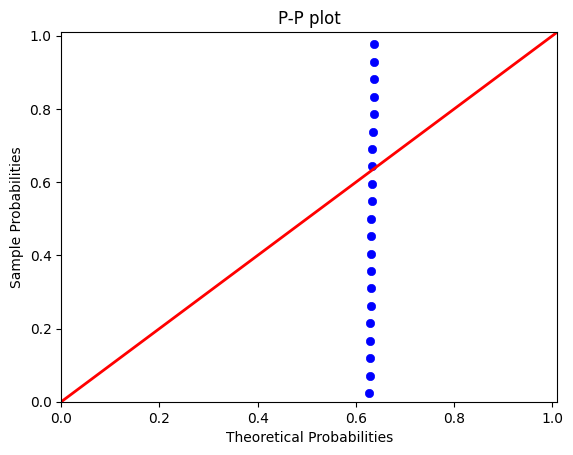



fin_servicio_caja Distr. Uniforme
Parámetro estimado: a = 45612.0
Parámetro estimado: b = 46858.0


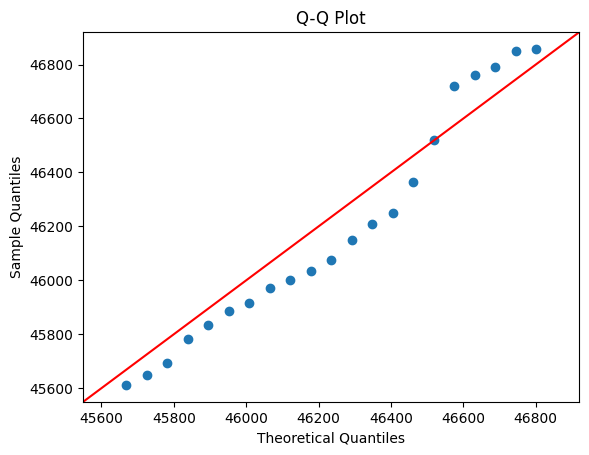

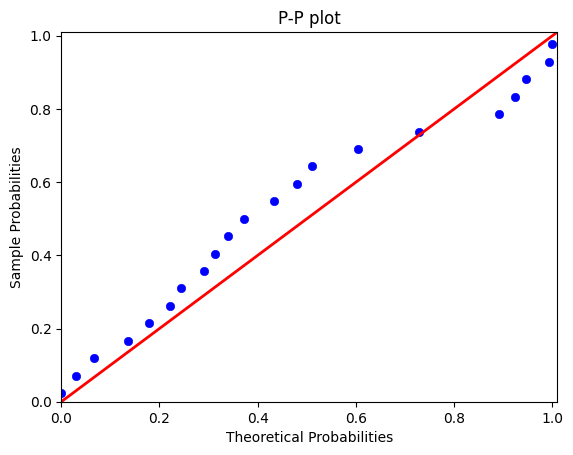



fin_servicio_caja Distr. Weibull
Parámetro estimado: Escala = 46394.960805596755
Parámetro estimado: Forma = 116.91101972742268


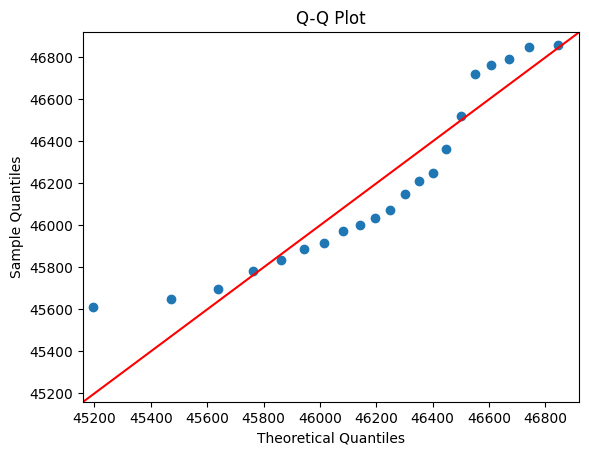

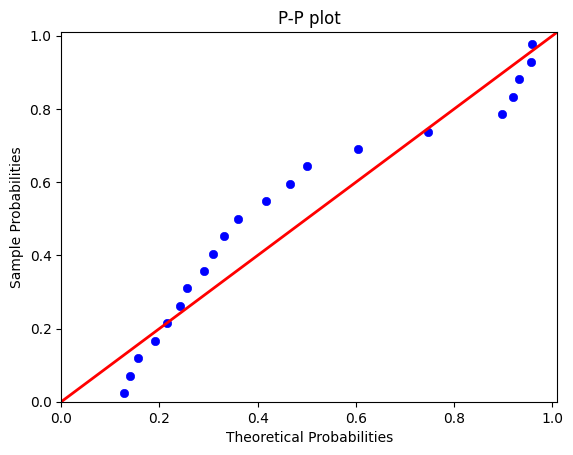



fin_servicio_caja Distr. LogNorm
Parámetro estimado (normal asociada): Media = 10.740425575838408
Parámetro estimado (normal asociada): Desviación Estándar = 0.008757107463938906


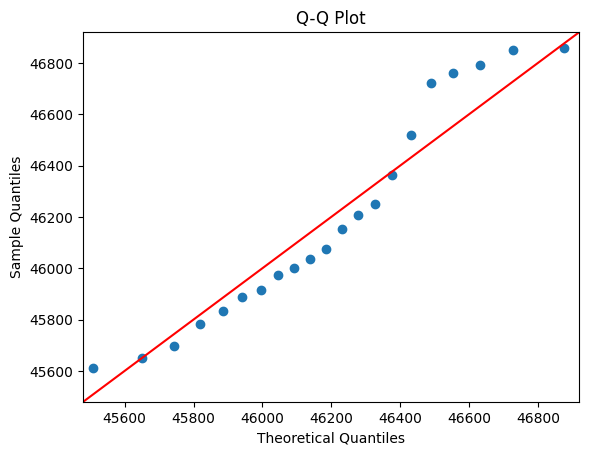

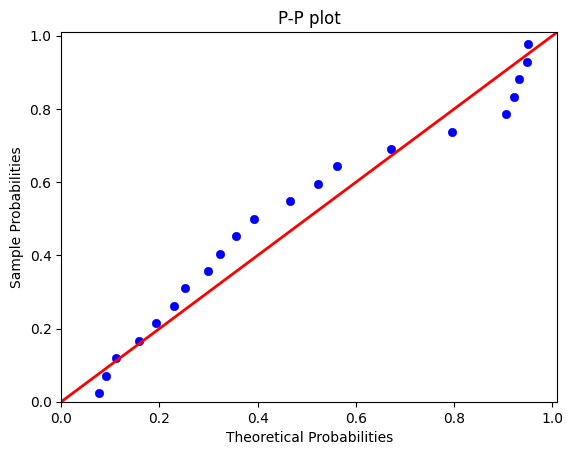



fin_servicio_caja Distr. Triang
Parámetro estimado: a = 45612.0
Parámetro estimado: b = 46858.0
Parámetro estimado: c = 45612.0


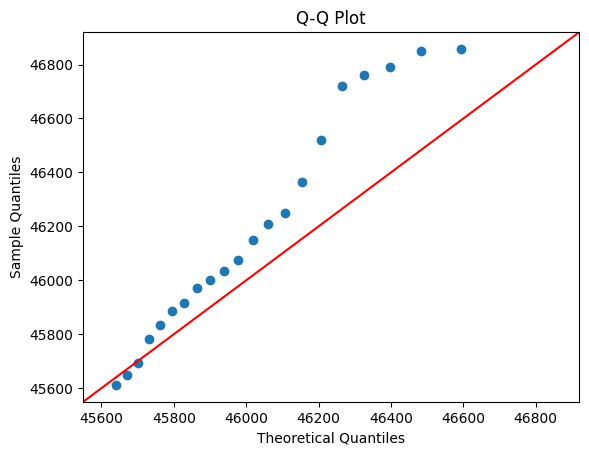

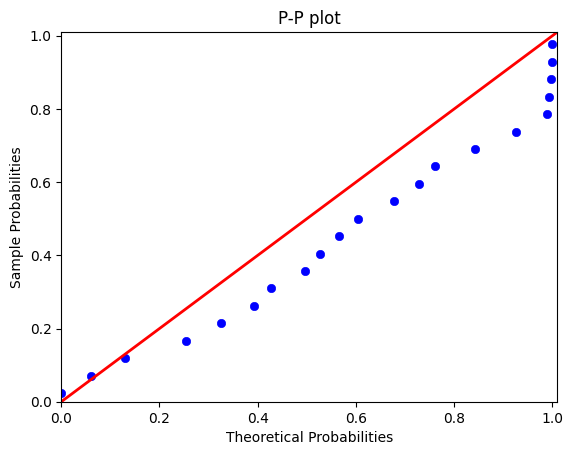

#############
#############
ts_caja_seg Distr. Normal
Parámetro estimado: Media = 38.81809523809524
Parámetro estimado: Desviación Estándar = 15.970655715747231


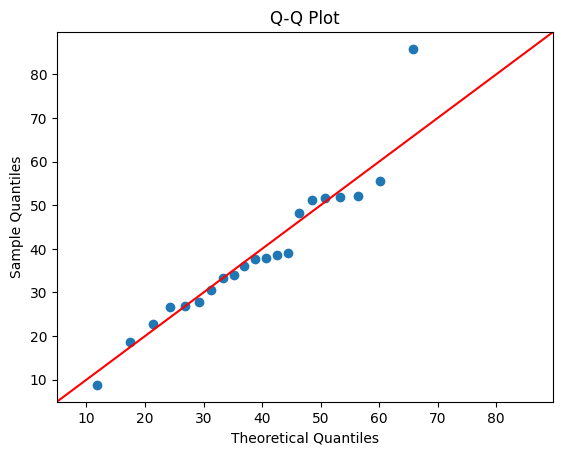

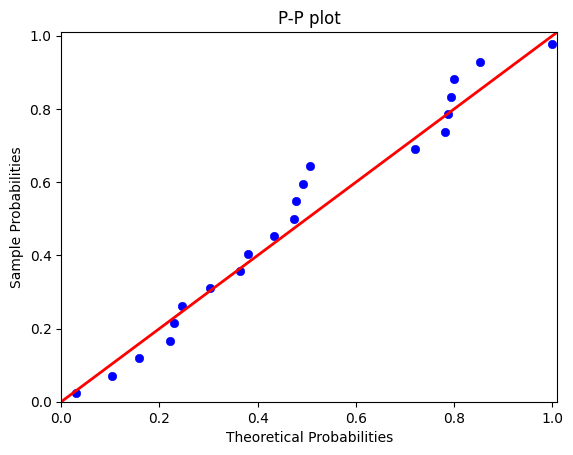



ts_caja_seg Distr. Exponencial
Parámetro estimado: Tasa = 0.025761181579528447


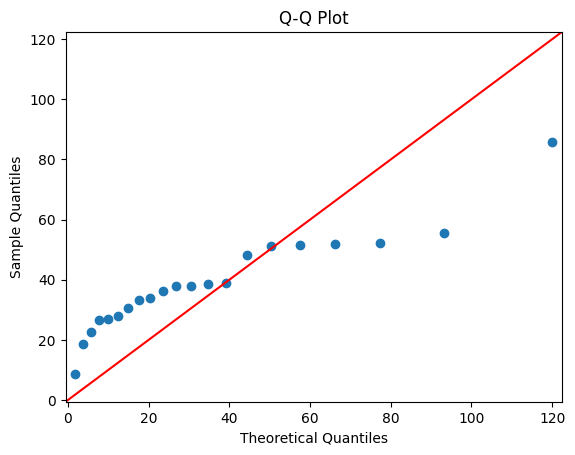

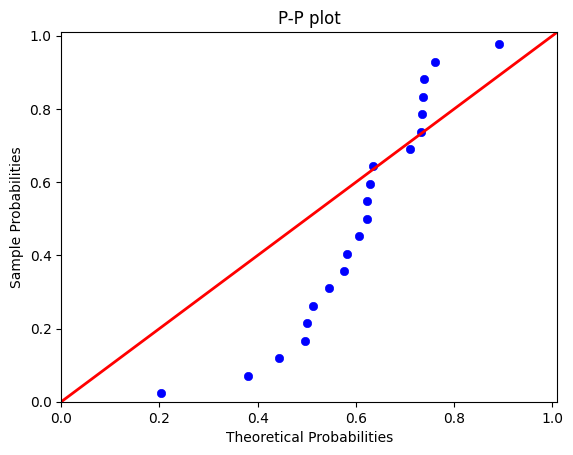



ts_caja_seg Distr. Uniforme
Parámetro estimado: a = 8.81
Parámetro estimado: b = 85.83


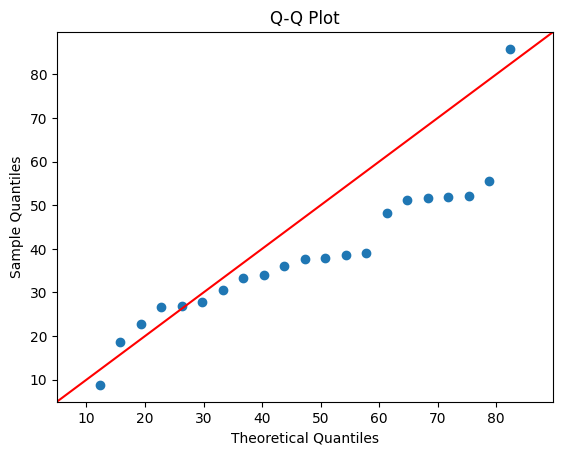

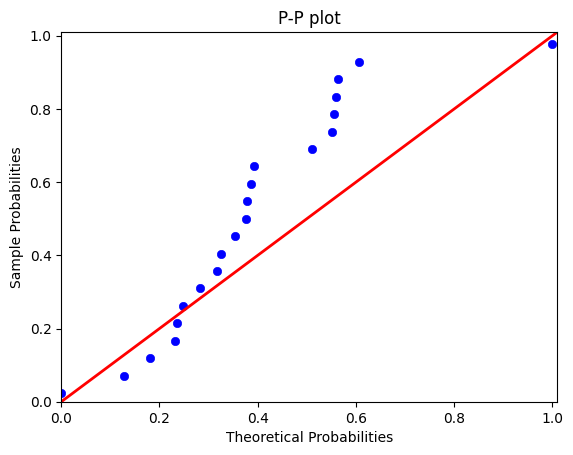



ts_caja_seg Distr. Weibull
Parámetro estimado: Escala = 43.67148670348192
Parámetro estimado: Forma = 2.5456976284079653


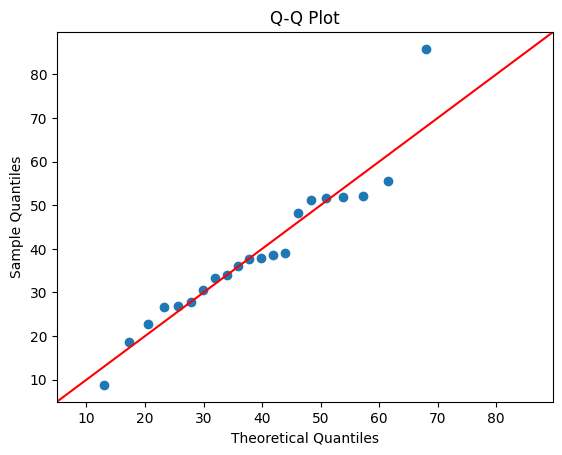

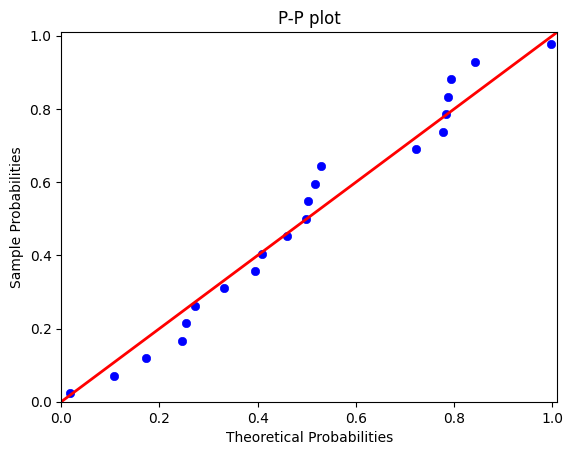



ts_caja_seg Distr. LogNorm
Parámetro estimado (normal asociada): Media = 3.5653314178226547
Parámetro estimado (normal asociada): Desviación Estándar = 0.46138326508955974


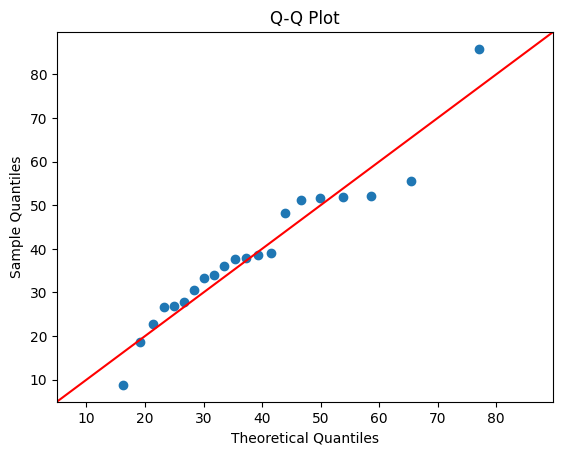

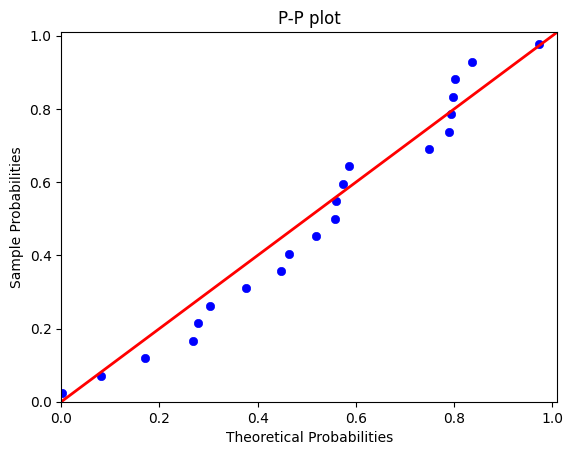



ts_caja_seg Distr. Triang
Parámetro estimado: a = 8.81
Parámetro estimado: b = 85.83
Parámetro estimado: c = 26.58


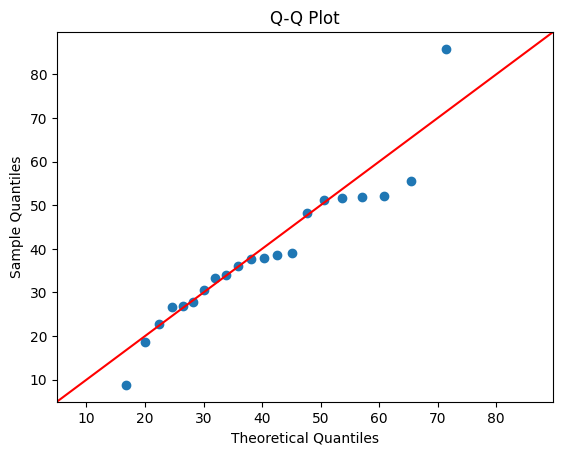

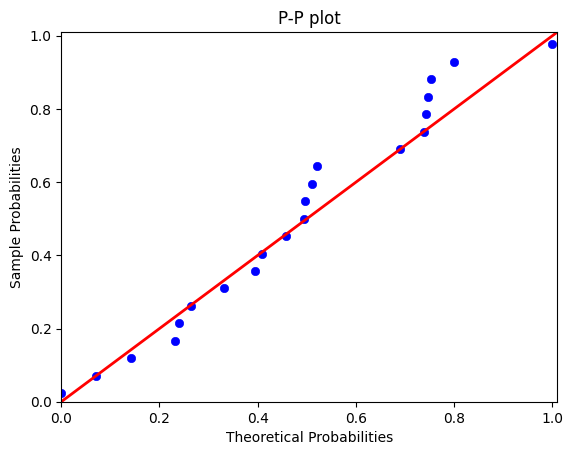

#############
#############
inicio_servicio_armado Distr. Normal
Parámetro estimado: Media = 46457.04761904762
Parámetro estimado: Desviación Estándar = 435.06884799343084


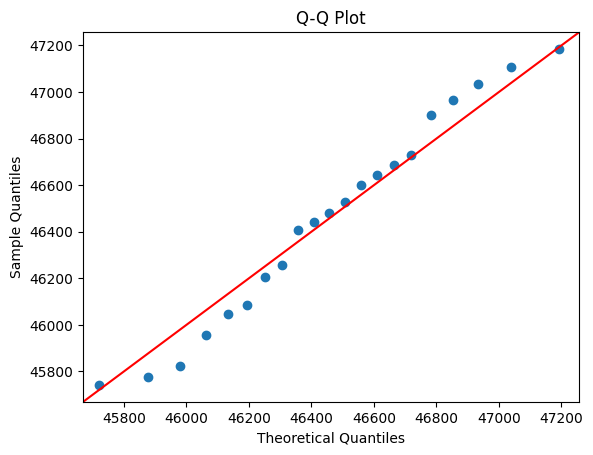

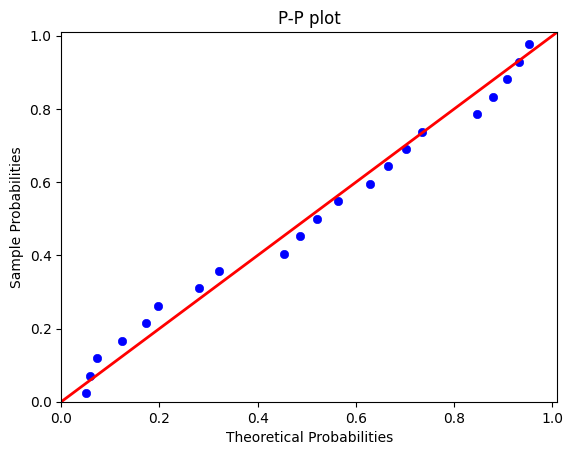



inicio_servicio_armado Distr. Exponencial
Parámetro estimado: Tasa = 2.1525259379375523e-05


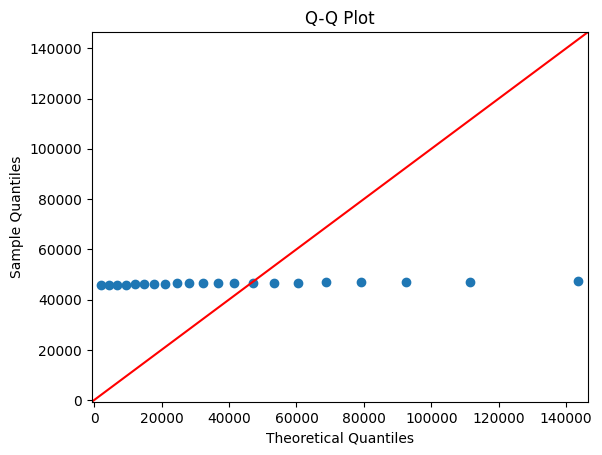

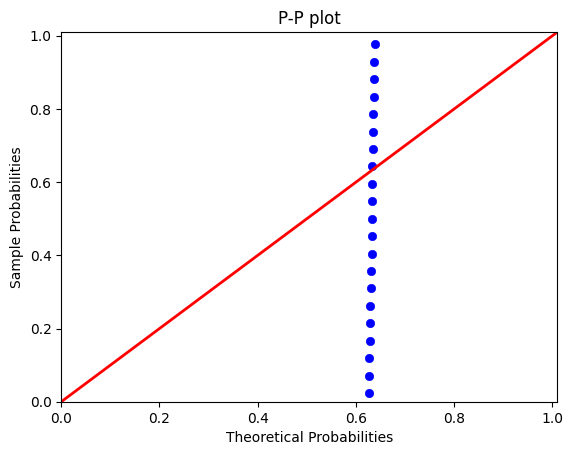



inicio_servicio_armado Distr. Uniforme
Parámetro estimado: a = 45742.0
Parámetro estimado: b = 47185.0


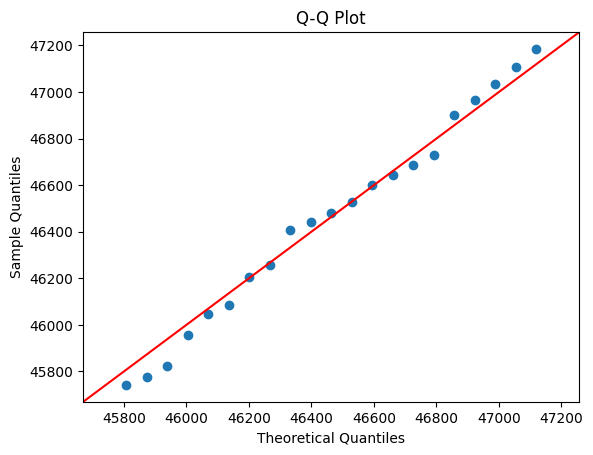

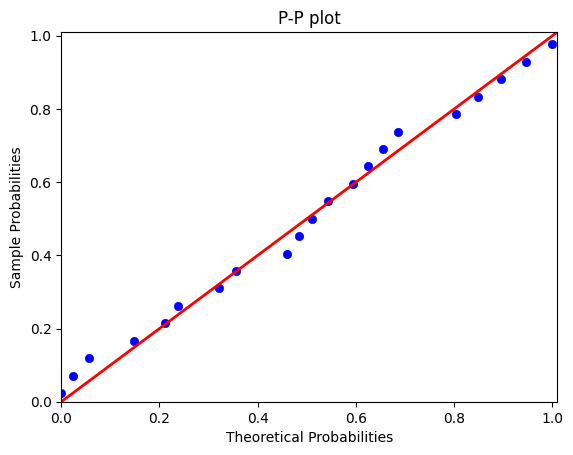



inicio_servicio_armado Distr. Weibull
Parámetro estimado: Escala = 46670.80903473926
Parámetro estimado: Forma = 118.63004158988328


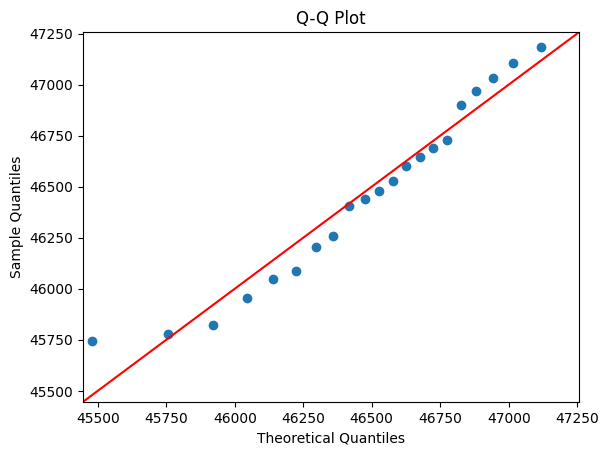

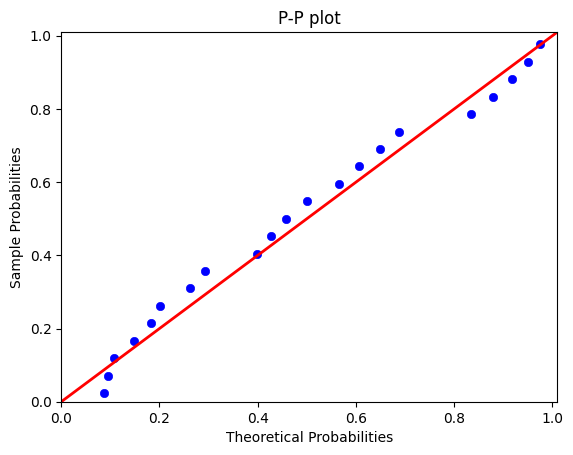



inicio_servicio_armado Distr. LogNorm
Parámetro estimado (normal asociada): Media = 10.746239588020828
Parámetro estimado (normal asociada): Desviación Estándar = 0.009367917428705656


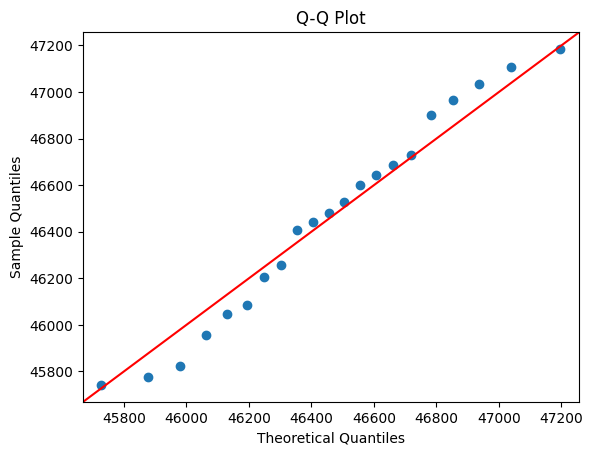

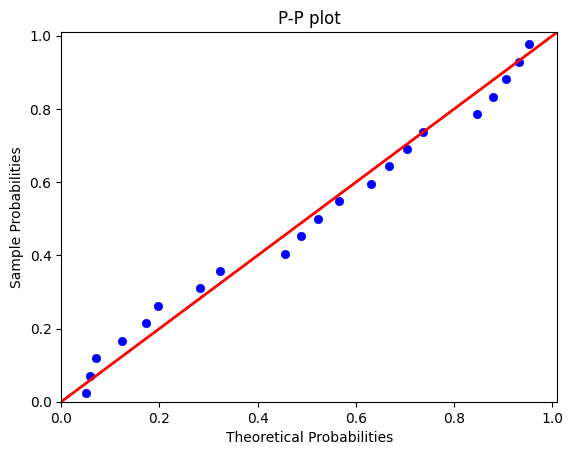



inicio_servicio_armado Distr. Triang
Parámetro estimado: a = 45742.0
Parámetro estimado: b = 47185.0
Parámetro estimado: c = 45742.0


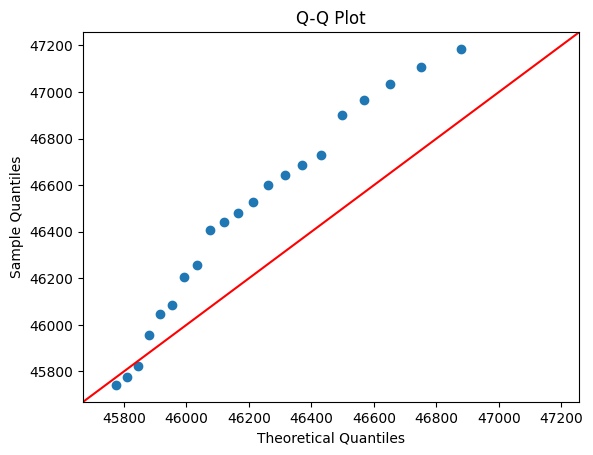

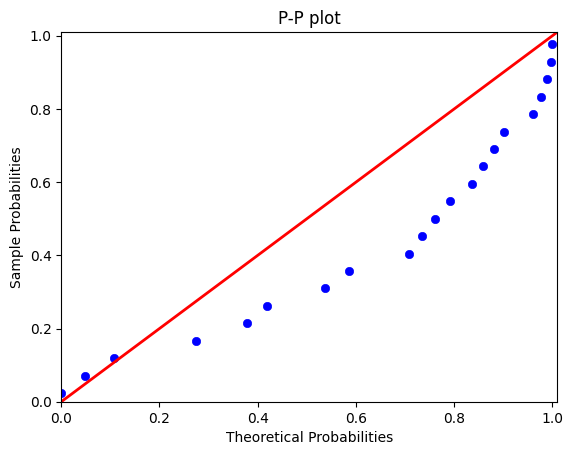

#############
#############
fin_servicio_armado Distr. Normal
Parámetro estimado: Media = 46553.90476190476
Parámetro estimado: Desviación Estándar = 390.9819024872665


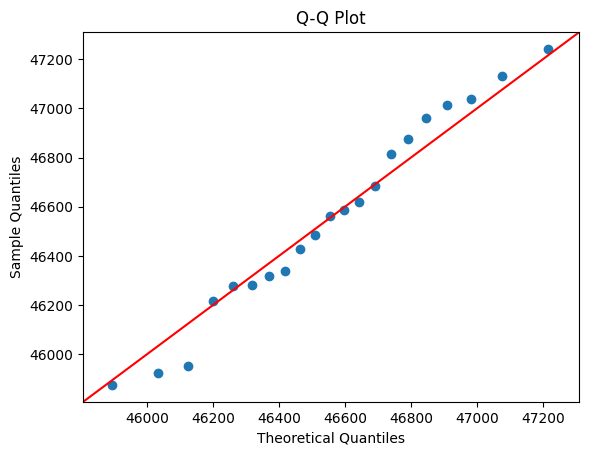

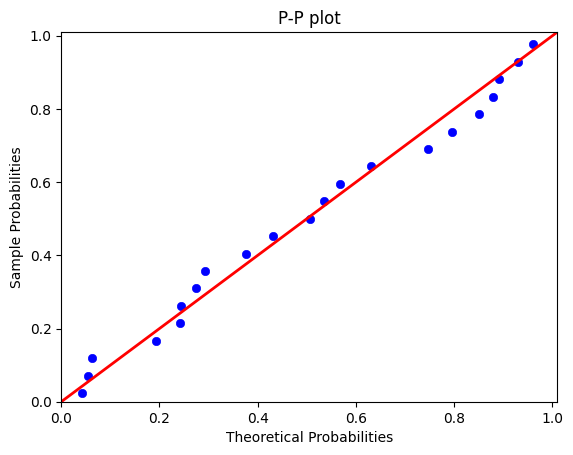



fin_servicio_armado Distr. Exponencial
Parámetro estimado: Tasa = 2.1480475270858565e-05


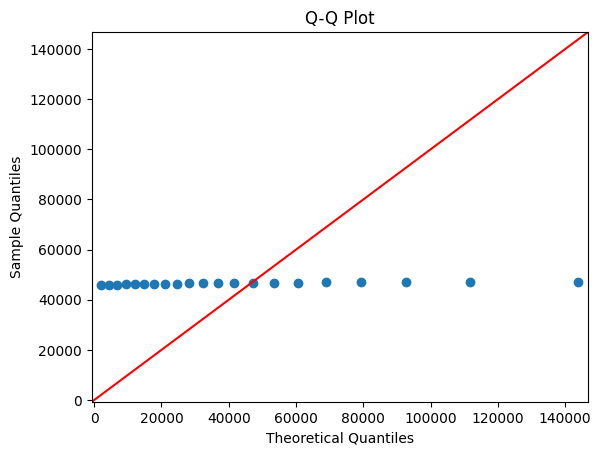

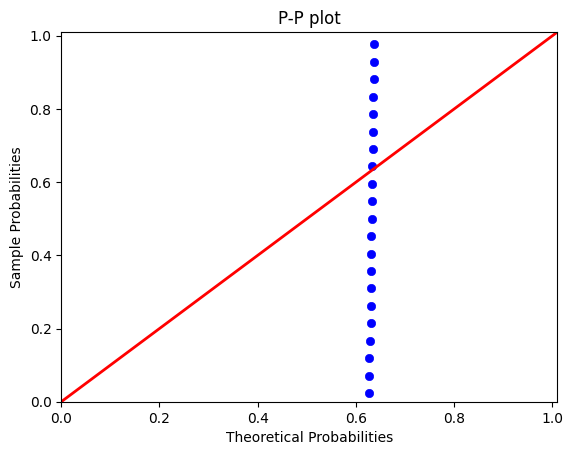



fin_servicio_armado Distr. Uniforme
Parámetro estimado: a = 45875.0
Parámetro estimado: b = 47242.0


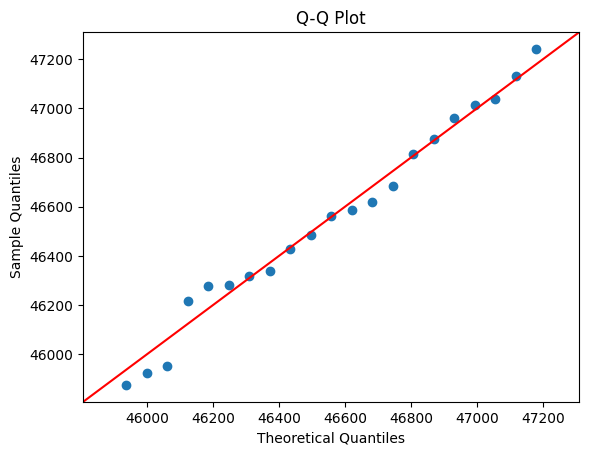

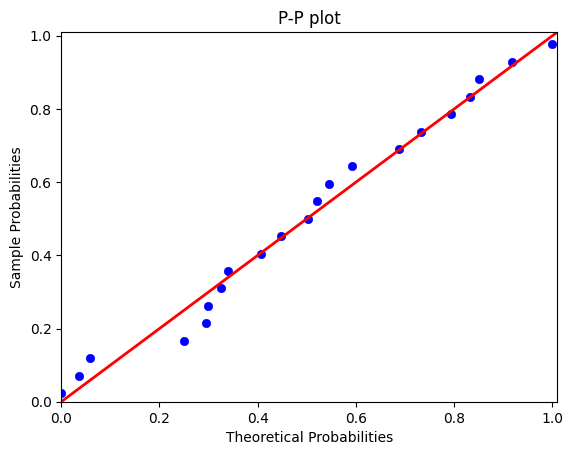



fin_servicio_armado Distr. Weibull
Parámetro estimado: Escala = 46746.856188988866
Parámetro estimado: Forma = 130.53462995587233


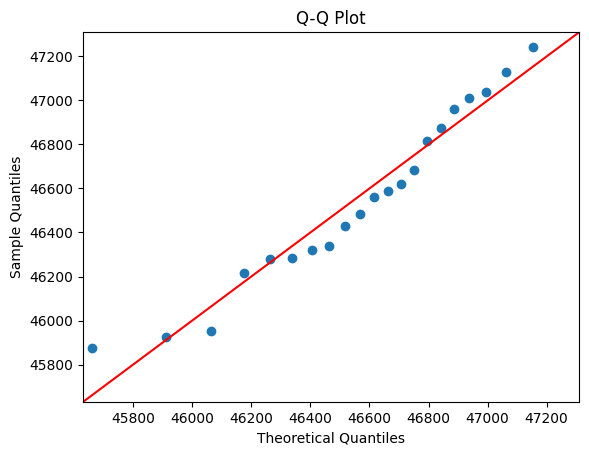

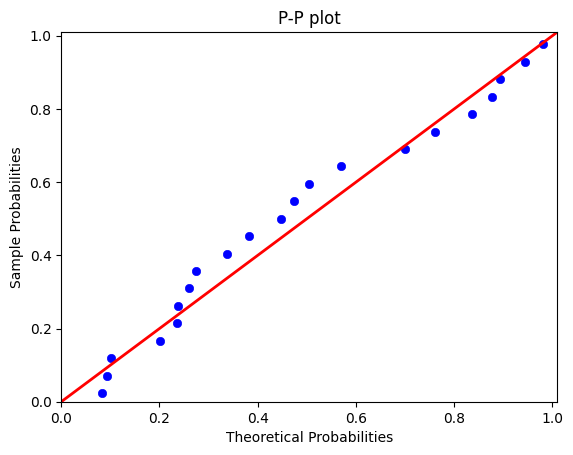



fin_servicio_armado Distr. LogNorm
Parámetro estimado (normal asociada): Media = 10.748330886960852
Parámetro estimado (normal asociada): Desviación Estándar = 0.00839996780543091


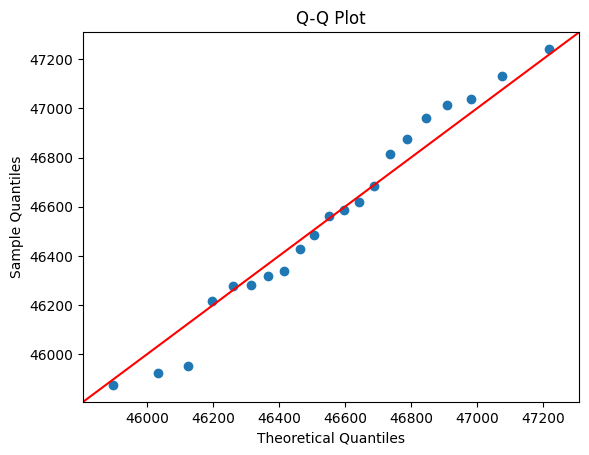

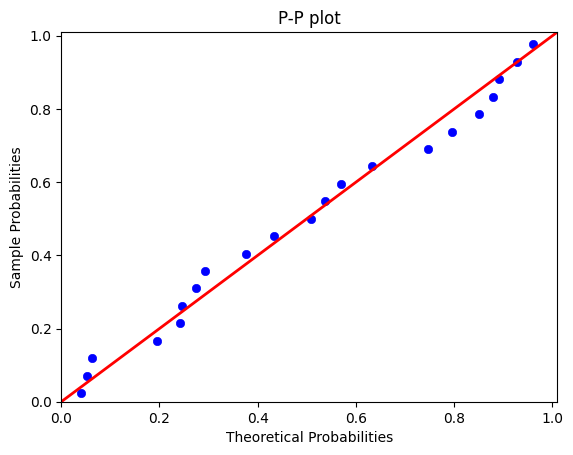



fin_servicio_armado Distr. Triang
Parámetro estimado: a = 45875.0
Parámetro estimado: b = 47242.0
Parámetro estimado: c = 45875.0


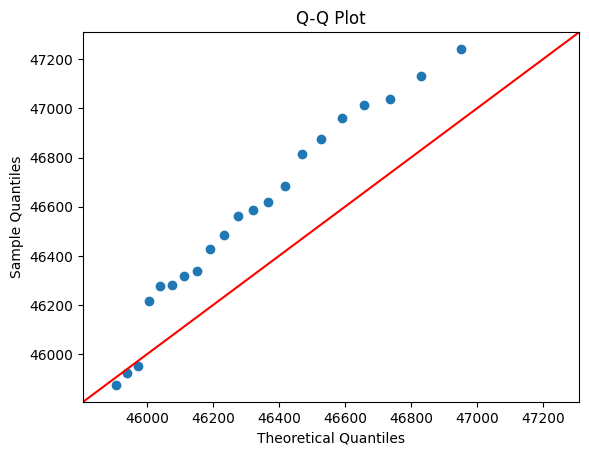

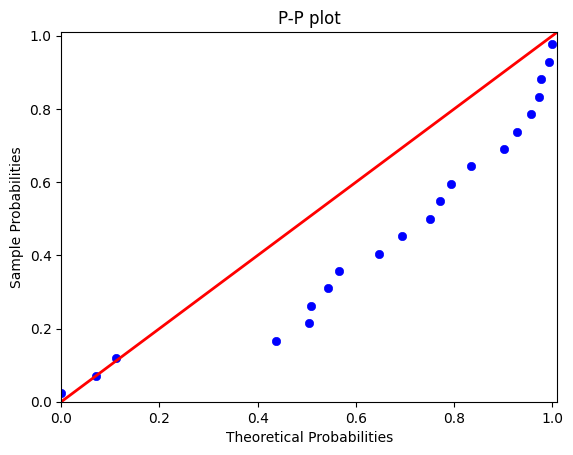

#############
#############
ts_armado_seg Distr. Normal
Parámetro estimado: Media = 96.79009523809525
Parámetro estimado: Desviación Estándar = 69.78623069052325


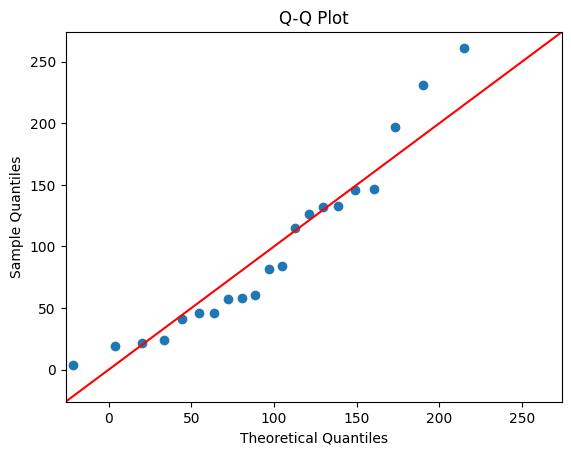

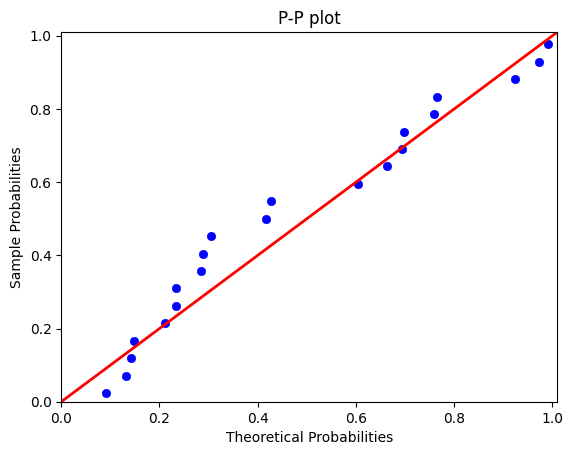



ts_armado_seg Distr. Exponencial
Parámetro estimado: Tasa = 0.0103316356651999


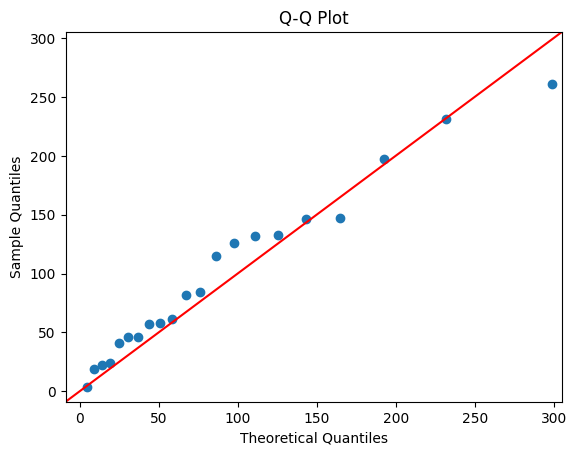

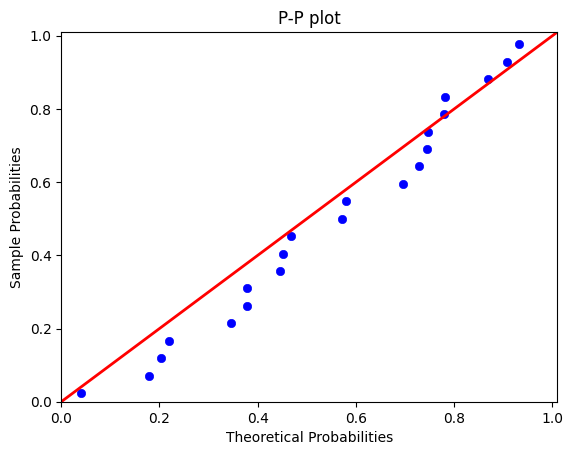



ts_armado_seg Distr. Uniforme
Parámetro estimado: a = 4.004
Parámetro estimado: b = 261.021


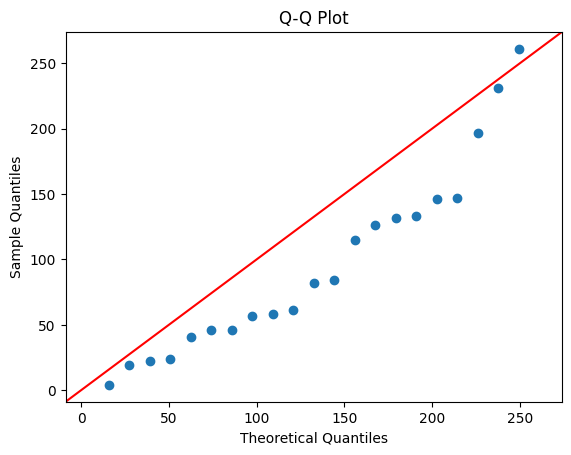

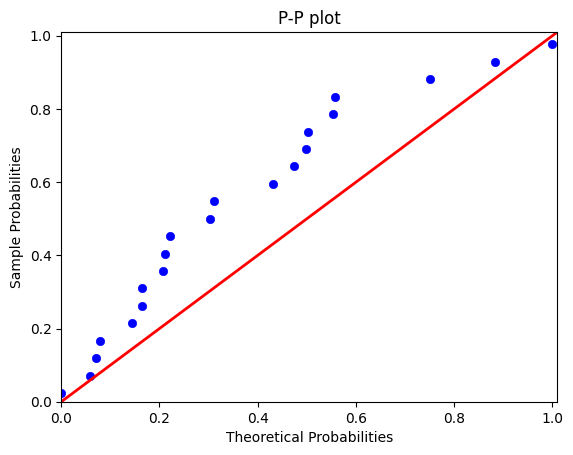



ts_armado_seg Distr. Weibull
Parámetro estimado: Escala = 105.47815812624742
Parámetro estimado: Forma = 1.3583770989928454


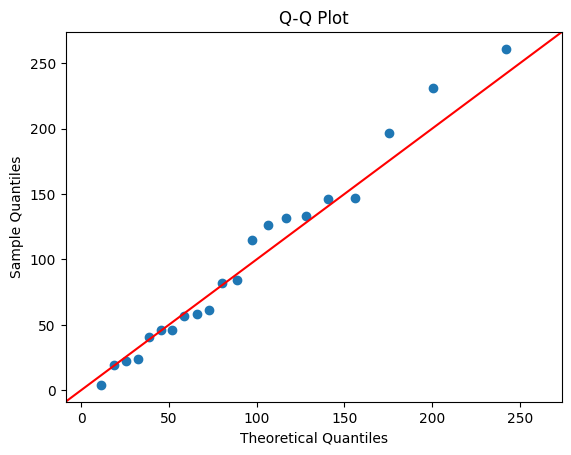

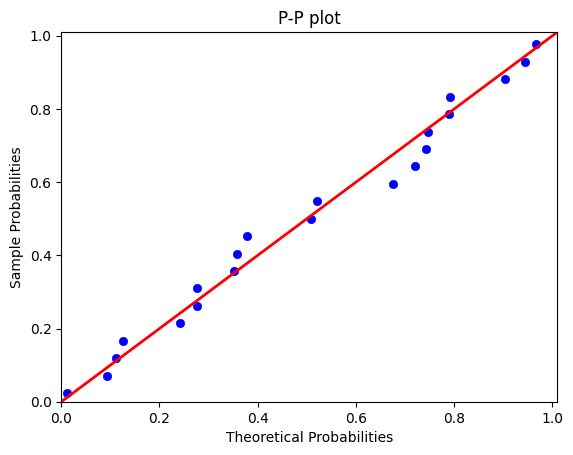



ts_armado_seg Distr. LogNorm
Parámetro estimado (normal asociada): Media = 4.221531632096541
Parámetro estimado (normal asociada): Desviación Estándar = 0.9726677608912396


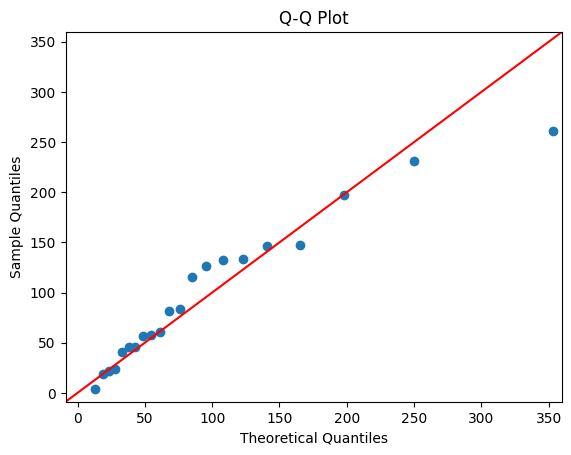

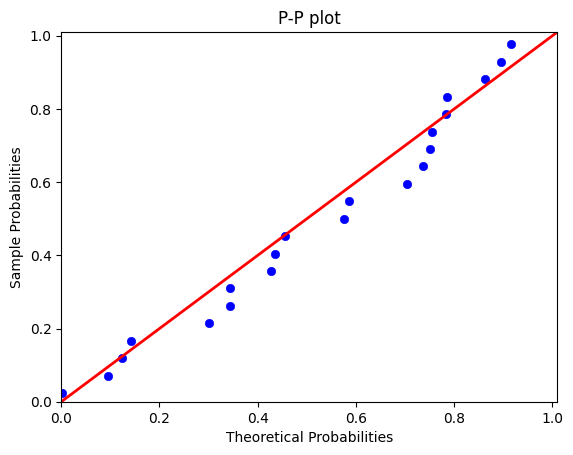



ts_armado_seg Distr. Triang
Parámetro estimado: a = 4.004
Parámetro estimado: b = 261.021
Parámetro estimado: c = 46.046


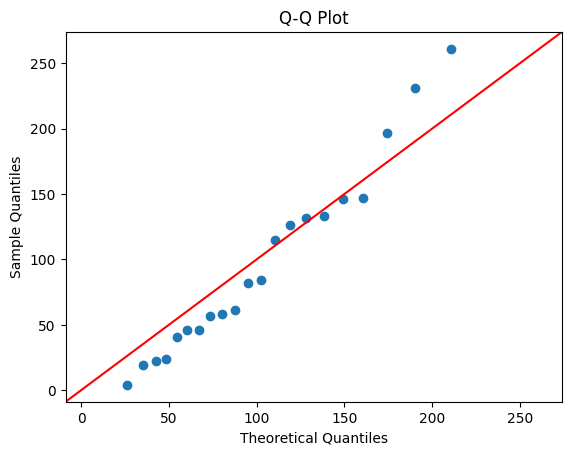

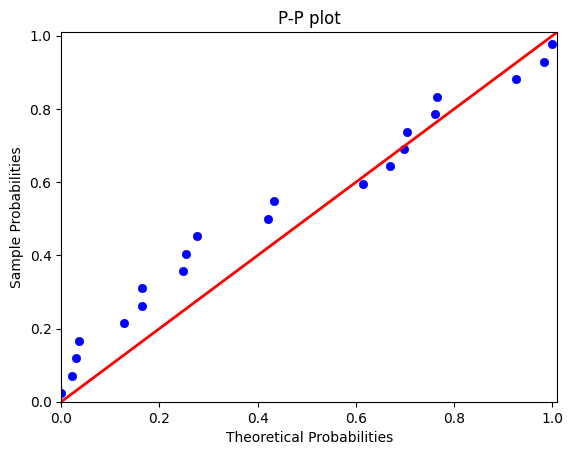

#############


In [155]:
for i in df.columns.tolist():
    series = np.array(df[i]).flatten()
    series = series.astype(float)
    print("#############")
    print(f"{i} Distr. Normal")
    PP_QQ_plot_normal(series,media="estimado",desvesta="estimado")
    print("\n")
    print(f"{i} Distr. Exponencial")
    PP_QQ_plot_exponential(series,tasa="estimado")    
    print("\n")
    print(f"{i} Distr. Uniforme")
    PP_QQ_plot_uniform(series,minimo="estimado",maximo="estimado")
    print("\n")
    print(f"{i} Distr. Weibull")
    PP_QQ_plot_weibull(series,forma="estimado",escala="estimado")
    print("\n")
    print(f"{i} Distr. LogNorm")
    PP_QQ_plot_lognormal(series,media="estimado",desvesta="estimado")
    print("\n")
    print(f"{i} Distr. Triang")
    PP_QQ_plot_triangular(series,minimo="estimado",maximo="estimado",moda="estimado")
    print("#############")

In [148]:
series = np.array(df['llegada_fila']).flatten()


In [149]:
series = series.astype(float)


Parámetro estimado: Media = 45979.52380952381
Parámetro estimado: Desviación Estándar = 361.2584642669776


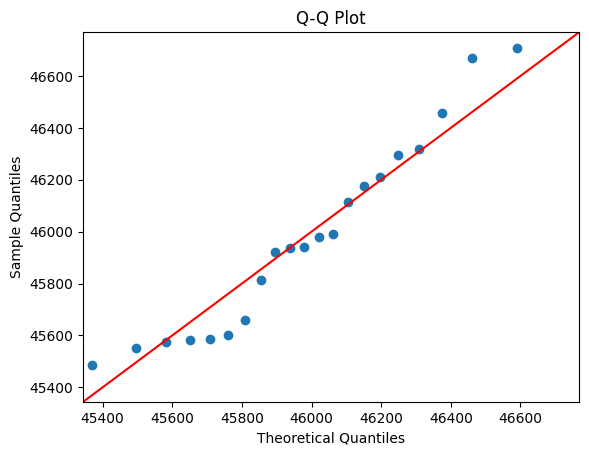

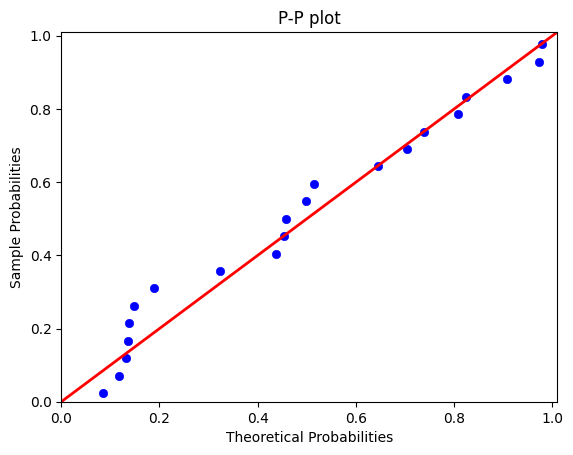

In [150]:
PP_QQ_plot_normal(series,media="estimado",desvesta="estimado")

In [158]:
for i in df.columns.tolist():
    series = np.array(df[i]).flatten()
    series = series.astype(float)
    data = series
    print("#############")
    print(f"{i} Distr. Normal")
    chi_square_normal_goodness_of_fit(data,media="estimado",desvesta="estimado",r=2)
    print("\n")

    print(f"{i} Distr. Exponencial")
    chi_square_exponential_goodness_of_fit(data,tasa="estimado",r=1)

    print("\n")
    print(f"{i} Distr. Uniforme")
    chi_square_uniform_goodness_of_fit(data,minimo="estimado",maximo="estimado",r=2)

    print("\n")
    print(f"{i} Distr. Weibull")
    chi_square_weibull_goodness_of_fit(data,forma="estimado",escala="estimado",r=2)
    print("\n")

    print(f"{i} Distr. LogNorm")
    chi_square_lognormal_goodness_of_fit(data,media="estimado",desvesta="estimado",r=2)
    print("\n")
    print(f"{i} Distr. Triang")
    chi_square_triangular_goodness_of_fit(data,minimo="estimado",maximo="estimado",moda="estimado",r=3)
    print("#############")

#############
llegada_fila Distr. Normal
Parámetro estimado: Media = 45979.52380952381
Parámetro estimado: Desviación Estándar = 361.2584642669776
Chi-squared statistic: 0.8928571428571983
p-value: 0.3447042220069425


llegada_fila Distr. Exponencial
Parámetro estimado: Tasa = 2.1748811582795654e-05
Chi-squared statistic: 57.75
p-value: 2.8821389719269064e-13


llegada_fila Distr. Uniforme
Parámetro estimado: a = 45486.0
Parámetro estimado: b = 46708.0
Chi-squared statistic: 0.7023809523809523
p-value: 0.4019848144297996


llegada_fila Distr. Weibull
Parámetro estimado: Escala = 46165.3542870777
Parámetro estimado: Forma = 125.24582324141484
Chi-squared statistic: 0.003753311910691362
p-value: 0.9511487383798019


llegada_fila Distr. LogNorm
Parámetro estimado (lognormal asociada): Media = 10.735920645232708
Parámetro estimado (lognormal asociada): Desviación Estándar = 0.00784374582841289
Chi-squared statistic: 0.9047619047618898
p-value: 0.3415080702827733


llegada_fila Distr. Trian

In [160]:
df.to_csv("ML_tiempos_segundos")